# Reversible Two Molecule Binding

The following binding model will be the focus of this notebook, herein we will derive equations for understanding this model and working with experimental data to suit it.

$$[M] + [L]\underset{k_{off}}{\overset{k_{on}}{\leftrightharpoons}} [ML]$$

The symbols $M$ and $L$ were selected to represent members in a common biochemical binding scenario: the *Macromolecule* and the *Ligand*. The *Macromolecule* could be a protein such as myoglobin, a ribozyme such as RNase P, a segment of double-stranded DNA, or even something else. The *Ligand* in many cases will be a small molecule, such as heme in the case of myoglobin, but it certainly need not be. Rnase P is a ribozyme that cleaves other RNA sequences, so in this case the *Ligand* is certainly also a macromolecule. We'll keep the $M$, $L$, $ML$ notation here for clarity and one must keep in mind that the equations apply to any system of two molecules that reversibly interact.

## Equilibrium Constants

As this is a reversible reaction, we anticipate a system composed originally of only reactants, $M$ and $L$, or products, $ML$, to eventually strike a balance between the two. Where this balance lies depends on the characteristic rate constants of the system, $k_{on}$ and $k_{off}$.

To be at equilibrium, the forward and reverse rates must be equivalent. This leads to the following deduction:

$$\text{At equilibrium: net rate is zero}$$

$$\therefore\text{rate_{forward} = rate_{reverse}}$$

$$k_{on}[M][L] = k_{off}[ML]$$

$$\frac{k_{on}}{k_{off}} = \frac{[ML]}{[M][L]} = K_{eq} = K_{A}$$

The forward equilibrium constant, $K_{eq}$, represents the balance of products over reactants at equilibrium: $K_{eq} = \frac{[ML]_{eq}}{[M]_{eq}[L]_{eq}}$

$K_{A}$ is simply another symbol for the equilibrium constant, where $A$ is taken to mean *"Association"*. This is useful nomenclatrue as we begin to discuss the reverse equilibrium constant, $K_{D}$, where $D$ means *"Dissociation"*.

$$K_{D} = \frac{1}{K_{A}}=\frac{[M][L]}{[ML]}=\frac{k_{off}}{k_{on}}$$

## Mass Balance Equations

When composing a mixture of $M$ and $L$, the initial quantities or concentrations are given as $[M]_{0}$ and $[L]_{0}$. At any given time, the following mass balance equations must hold:

$$[M]_{0} = [M] + [ML]$$

$$[L]_{0} = [L] + [ML]$$

## General Equation

Let us determine an equation relating the amount of $[ML]$ and our initial concentrations. The first step is to generate the equation with only the terms $K_{D}$, $[ML]$, $[M]_{0}$, and $[L]_{0}$ by subsituting our mass balance equations into the equation for $K_{D}$:

$$K_{D} = \frac{[M][L]}{[ML]} = \frac{([M]_{0}-[ML])([L]_{0}-[ML])}{[ML]}$$

This we may rearrange to:

$$K_{D}[ML] = ([M]_{0}-[ML])([L]_{0}-[ML])$$

$$K_{D}[ML] = [ML]^{2}-([M]_{0} + [L]_{0})[ML]+[M]_{0}[L]_{0}$$

$$0 = [ML]^{2}-([M]_{0} + [L]_{0} + K_{D})[ML]+[M]_{0}[L]_{0}$$

This is then in the quadratic form $ax^{2}+bx+c$ where $x$ is $[ML]$ and we obtain the following coefficients:

$$a = 1$$

$$b = -([M]_{0} + [L]_{0} + K_{D})$$

$$c = [M]_{0}[L]_{0}$$

Solving the quadratic formula $x = \frac{-b \pm \sqrt{b^{2} - 4ac}}{2a}$ with these coefficients will thus give a solution for $[ML]$ (we will ignore).

In [4]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as pyplot

In [85]:
def general_binding(kd, m_initial, l_initial):
    """
    A function to model the general binding equation for reversible two molecule
    interactions.
    """
    a = 1.0
    b = -1.0 * (kd + m_initial + l_initial)
    c = m_initial * l_initial

    discriminant = np.power(b, 2) - (4 * a * c)

    first_term = -1 * b
    second_term = np.sqrt(discriminant)

    return (first_term - second_term) / (2 * a)

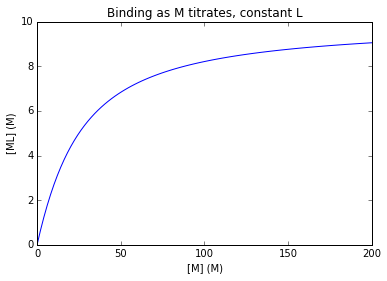

In [119]:
m_range = np.linspace(0, 200, 100)
ml = general_binding(20, m_range, 10)

pyplot.plot(m_range, ml)
pyplot.title('Binding as M titrates, constant L')
pyplot.xlabel('[M] (M)')
pyplot.ylabel('[ML] (M)')

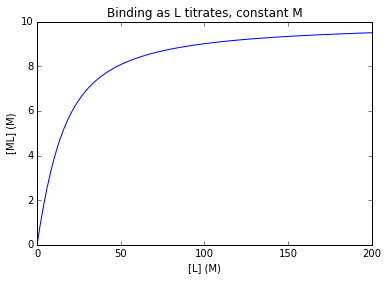

In [96]:
l_range = np.linspace(0, 200, 100)
ml = general_binding(10, 10, l_range)

pyplot.plot(l_range, ml)
pyplot.title('Binding as L titrates, constant M')
pyplot.xlabel('[L] (M)')
pyplot.ylabel('[ML] (M)')

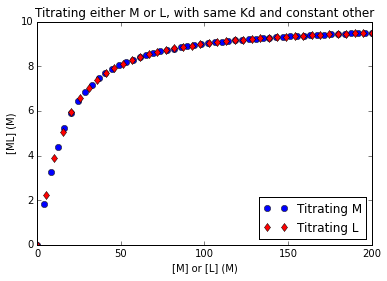

In [108]:
#Doesn't matter which you titrate
m_range = np.linspace(0, 200, 50)
m_titrate = general_binding(10, m_range, 10)

l_range = np.linspace(0, 200, 40)
l_titrate = general_binding(10, 10, l_range)

pyplot.plot(m_range, m_titrate, 'bo', label='Titrating M')
pyplot.plot(l_range, l_titrate, 'rd', label='Titrating L')
pyplot.title('Titrating either M or L, with same Kd and constant other')
pyplot.xlabel('[M] or [L] (M)')
pyplot.ylabel('[ML] (M)')
pyplot.legend(loc='best')

In [109]:
def scaled_general_binding(scaling, kd, m_initial, l_initial):
    """
    A function to model the general binding equation for reversible two molecule
    interactions.
    """
    a = 1.0
    b = -1.0 * (kd + m_initial + l_initial)
    c = m_initial * l_initial

    discriminant = np.power(b, 2) - (4 * a * c)

    first_term = -1 * b
    second_term = np.sqrt(discriminant)

    return scaling * (first_term - second_term) / (2 * a)

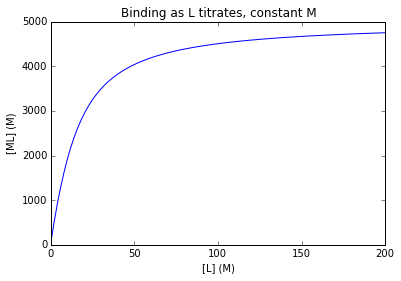

In [112]:
l_range = np.linspace(0, 200, 100)
ml = scaled_general_binding(500, 10, 10, l_range)

pyplot.plot(l_range, ml)
pyplot.title('Binding as L titrates, constant M')
pyplot.xlabel('[L] (M)')
pyplot.ylabel('[ML] (M)')

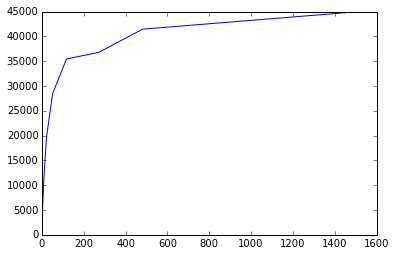

In [116]:
m = np.array([0.0,0.145,0.33495,0.77285,1.7835,3.6685,9.541,22.04,50.895,117.595,271.15,481.4,1450])
l = 0.1
fluorescence = np.array([339.3333333333,492,1418.6666666667,1341,3130,5509.3333333333,11389.3333333333,19671.6666666667,28406,35452,36769.6666666667,41462.8422425033,44774.3333333333])

pyplot.plot(m, fluorescence)

In [ ]:
def 